<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width = 400, align = "center"></a>

# <center>Simple Linear Regression</center>


#### About this Notebook
In this notebook, we learn how to use scikit-learn to implement simple linear regression. We download a dataset that is related to fuel consumption and Carbon dioxide emission of cars. Then, we split our data into training and test sets, create a model using training set, Evaluate your model using test set, and finally use model to predict unknown value


### Importing Needed packages

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

## Reading the data in

In [23]:
df = pd.read_csv("dataset_hotel_bookings.csv")
# take a look at the dataset
df.head()

C:\Users\gabri\AppData\Local\Temp\ipykernel_11480\1059988475.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("dataset_hotel_bookings.csv")


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,var_r,filter_$,arrival_month
0,1,0,342,2015,7,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,491,0,7
1,1,0,737,2015,7,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,737,0,7
2,1,0,7,2015,7,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,245,0,7
3,1,0,13,2015,7,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,245,0,7
4,1,0,14,2015,7,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,245,0,7


### Data Exploration
Lets first have a descriptive exploration on our data.

In [4]:
# summarize the data
df.describe()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,var_r,filter_$,arrival_month
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.335539,0.370416,104.011416,2016.156554,6.552483,27.165173,15.798241,0.927599,2.500302,1.856403,...,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363,275.097345,0.815763,6.552483
std,0.472181,0.482918,106.863097,0.707476,3.090619,13.605138,8.780829,0.998613,1.908286,0.579261,...,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798,83.744505,0.387679,3.090619
min,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,245.000000,0.000000,1.000000
25%,0.000000,0.000000,18.000000,2016.000000,4.000000,16.000000,8.000000,0.000000,1.000000,2.000000,...,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000,245.000000,1.000000,4.000000
50%,0.000000,0.000000,69.000000,2016.000000,7.000000,28.000000,16.000000,1.000000,2.000000,2.000000,...,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000,245.000000,1.000000,7.000000
75%,1.000000,1.000000,160.000000,2017.000000,9.000000,38.000000,23.000000,2.000000,3.000000,2.000000,...,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,245.000000,1.000000,9.000000
max,1.000000,1.000000,737.000000,2017.000000,12.000000,53.000000,31.000000,19.000000,50.000000,55.000000,...,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,737.000000,1.000000,12.000000


Lets select some features to explore more.

In [5]:
cdf = df[['hotel','lead_time','arrival_date_month','stays_in_weekend_nights', 'stays_in_week_nights']]
cdf.head(9)

,hotel,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights
0,1,342,7,0,0
1,1,737,7,0,0
2,1,7,7,0,1
3,1,13,7,0,1
4,1,14,7,0,2
5,1,14,7,0,2
6,1,0,7,0,2
7,1,9,7,0,2
8,1,85,7,0,3


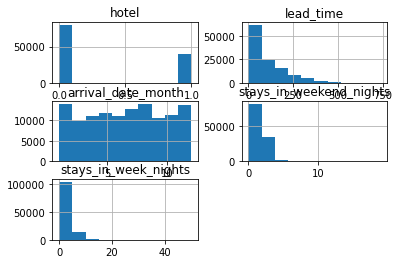

In [6]:
viz = cdf[['hotel','lead_time','arrival_date_month','stays_in_weekend_nights', 'stays_in_week_nights']]
viz.hist()
plt.show()

Now, lets plot each of these features vs the lead time, to see how linear is their relation:

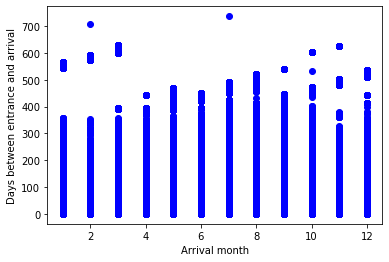

In [12]:
plt.scatter(cdf.arrival_date_month, cdf.lead_time,  color='blue')
plt.xlabel("Arrival month")
plt.ylabel("Days between entrance and arrival")
plt.show()

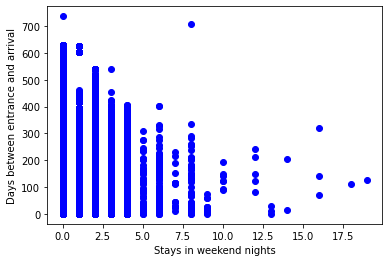

In [13]:
plt.scatter(cdf.stays_in_weekend_nights, cdf.lead_time,  color='blue')
plt.xlabel("Stays in weekend nights")
plt.ylabel("Days between entrance and arrival")
plt.show()

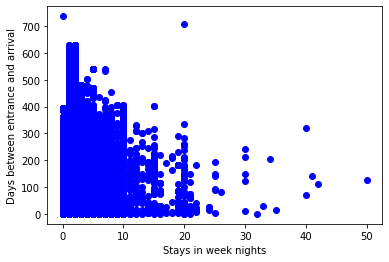

In [14]:
# write your code here
plt.scatter(cdf.stays_in_week_nights, cdf.lead_time, color='blue')
plt.xlabel("Stays in week nights")
plt.ylabel("Days between entrance and arrival")
plt.show()

#### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.



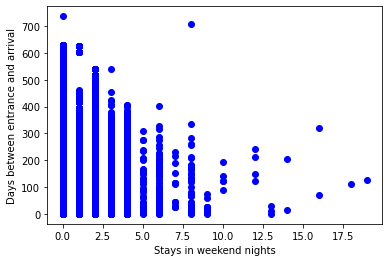

In [24]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

plt.scatter(train.stays_in_weekend_nights, train.lead_time,  color='blue')
plt.xlabel("Stays in weekend nights")
plt.ylabel("Days between entrance and arrival")
plt.show()

### Simple Regression Model
Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation. 

#### Modeling
Using sklearn package to model data.

Coefficients:  [[9.22892125]]
Intercept:  [95.59215845]


Text(0, 0.5, 'Days between entrance and arrival')

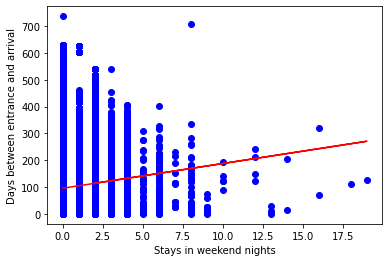

In [25]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['stays_in_weekend_nights']])
train_y = np.asanyarray(train[['lead_time']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

plt.scatter(train.stays_in_weekend_nights, train.lead_time,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Stays in weekend nights")
plt.ylabel("Days between entrance and arrival")

As mentioned before, __Coefficient__ and __Intercept__ in the simple linear regression, are the parameters of the fit line. 
Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. 
Notice that all of the data must be available to traverse and calculate the parameters.


#### Plot outputs

we can plot the fit line over the data:

#### Evaluation
we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 
    - Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.
    - Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.
    - Root Mean Squared Error (RMSE).
    - R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).


In [19]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['stays_in_weekend_nights']])
test_y = np.asanyarray(test[['lead_time']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 84.45
Residual sum of squares (MSE): 11552.58
R2-score: -133.90
